In [ ]:
#knn
#naive bayes
#svc
#decision tree
#adaboost
#random forest

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/DATASETS/stroke.csv")
df
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
df['ever_married']=le.fit_transform(df['ever_married'])

In [ ]:
df['work_type']=le.fit_transform(df['work_type'])
df['Residence_type']=le.fit_transform(df['Residence_type'])
df['smoking_status']=le.fit_transform(df['smoking_status'])
df['gender']=le.fit_transform(df['gender'])

In [ ]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [ ]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [ ]:
from imblearn.over_sampling import SMOTE

os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]
mm=MinMaxScaler()
X_sc=mm.fit_transform(X)

X_train,X_test,y_train,y_test= train_test_split(X_os,y_os,test_size=0.3,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred1=knn.predict(X_test)

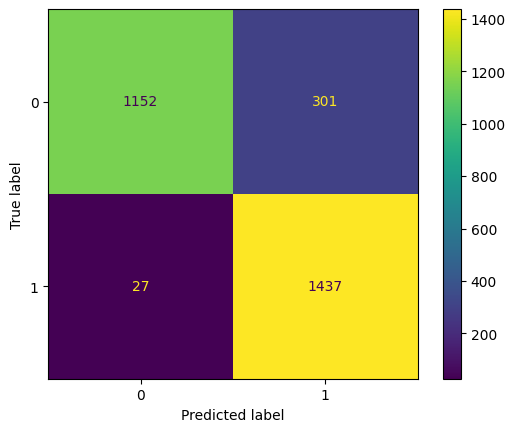

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      1453
           1       0.83      0.98      0.90      1464

    accuracy                           0.89      2917
   macro avg       0.90      0.89      0.89      2917
weighted avg       0.90      0.89      0.89      2917



In [ ]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)

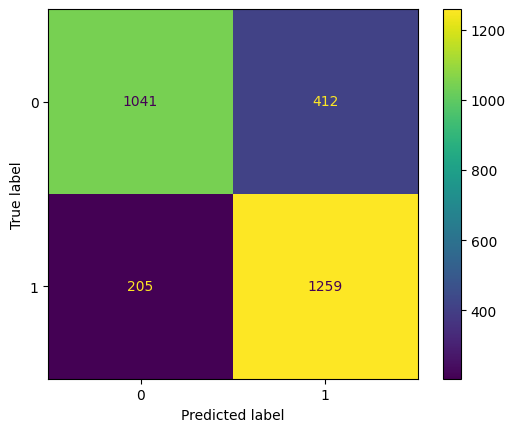

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred2))

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.72      0.77      1453
           1       0.75      0.86      0.80      1464

    accuracy                           0.79      2917
   macro avg       0.79      0.79      0.79      2917
weighted avg       0.79      0.79      0.79      2917



In [ ]:
sv=SVC(kernel="poly")
sv.fit(X_train,y_train)
y_pred3=sv.predict(X_test)

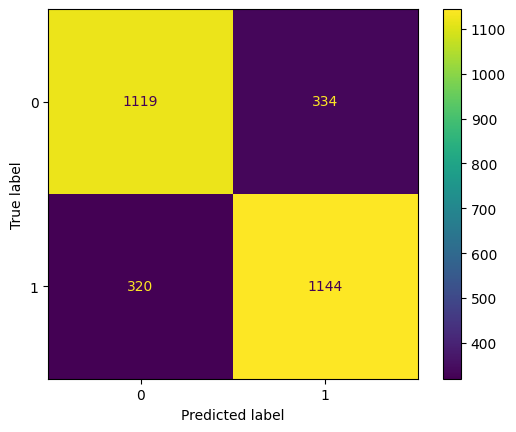

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred3))

In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1453
           1       0.77      0.78      0.78      1464

    accuracy                           0.78      2917
   macro avg       0.78      0.78      0.78      2917
weighted avg       0.78      0.78      0.78      2917



In [ ]:
tree=DecisionTreeClassifier(max_depth=4)
tree.fit(X_train,y_train)
y_pred4=tree.predict(X_test)

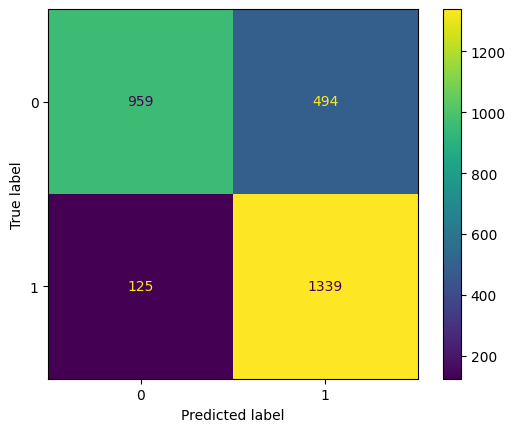

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred4))

In [ ]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.88      0.66      0.76      1453
           1       0.73      0.91      0.81      1464

    accuracy                           0.79      2917
   macro avg       0.81      0.79      0.78      2917
weighted avg       0.81      0.79      0.78      2917



In [ ]:
ada=AdaBoostClassifier(n_estimators=100,random_state=1)
ada.fit(X_train,y_train)
y_pred5=ada.predict(X_test)

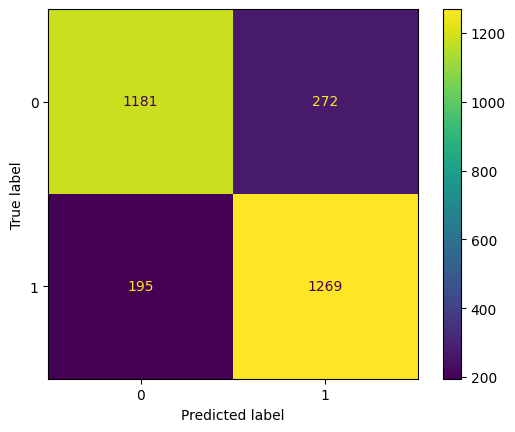

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred5))

In [ ]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1453
           1       0.82      0.87      0.84      1464

    accuracy                           0.84      2917
   macro avg       0.84      0.84      0.84      2917
weighted avg       0.84      0.84      0.84      2917



In [ ]:
rf=RandomForestClassifier(random_state=1,n_estimators=100)
rf.fit(X_train,y_train)
y_pred6=rf.predict(X_test)

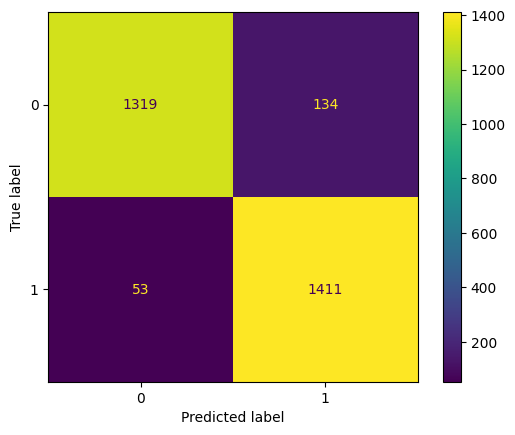

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred6))

In [ ]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1453
           1       0.92      0.96      0.94      1464

    accuracy                           0.94      2917
   macro avg       0.94      0.94      0.94      2917
weighted avg       0.94      0.94      0.94      2917

